# **The Effects of Lifestyle Factors on Sleep**

**Data Visualization Project By Sisritha Avala**

My main objective for this project was to analyze patterns between sleep and factors such as exercise and psychotropic drug use(caffeine, alcohol, and nicotine) in order to identify each of their effects. Is there a negative impact on sleep in relation to drug intake? Do people who exercise have better sleep than people who don't? Do these factors have any effects on sleep whatsoever? With sleep being such an important part of everyone's lives, I thought it was important to explore these relationships and present my findings about the potential effects of these life choices.

Though I wish to answer these questions with 100% accuracy, I realize that I have a limited dataset and therefore can't be definitive. On that account, based on my findings within the data, I'm going to theorize the answers to my proposed questions.

I chose a dataset that was based on sleep efficiency in relation to various lifestyle factors. It includes data that was collected using a combination of polysomnography, actigraphy, and surveys through a study that was conducted in Morocco by a team of artifical intelligence engineering students. The NIH published a study that stated that caffeine, alcohol, and nicotine were all psychotropic drugs and I was curious to find out if the intake of these drugs could affect something as important as sleep(Crocq, 2003). This dataset honed in on those potential harmful factors which allowed me to dissect it for further examination.

In [20]:
%matplotlib inline
import numpy as np              
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Provides a sneak peak of the data and the columns being targeted
df = pd.read_csv("Sleep_Efficiency.csv")
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


# Sleep Efficiency Data Dictionary

1. ID: Identifier for each test subject
2. Age: Age of the subject
3. Gender: Male/Female
4. Bedtime: Time at which the subject goes to bed
5. Wakeup Time: Time at which the subject wakes up 
6. **Sleep duration**: Time spent asleep in bed
7. **Sleep Efficiency**: Proportional measure of time spent asleep in bed
8. REM Sleep Percentage: Percentage of time in REM sleep
9. Deep Sleep Percentage: Percentage of time in Deep Sleep 
10. Light Sleep Percentage: Percentage of time in Light Sleep 
11. Awakenings: Amount of times the subject woke up in bed 
12. **Caffeine consumption**: Amount of caffeine consumed in the 24 hrs before bedtime (in mg)
13. **Alcohol consumption**: Amount of alcohol consumed in the 24 hrs before bedtime (in oz)
14. **Smoking status**: If the subject smokes or not (Y/N)
15. **Exercise frequency**: Amount of times the subject exercises in a week

The fields that have been bolded are the main focal point of this project. The other columns of data are important components but they included overlaps and not of dire consequence to answer my intitally posed questions.

In [8]:
# Dropped the missing values rows so it doesn't skew the graph
df = df.dropna()

After taking a look at the entire data in Excel I noticed that it was missing a few values in the Caffeine Consumption column and Alcohol Consumption column which is unfortunate because they are crucial to the visualizations. I had to delete a few rows that included the empty values. Though some were removed from the graphs, they will still provide an idea of the potential effects on sleep because of the remaining hundreds of data points.

Figure 1.

Before I dove into the potential effects on sleep, I wanted to get a good idea of the average amount of sleep that everyone in this study was getting.

Text(0.5, 1.0, 'Average Duration of Sleep')

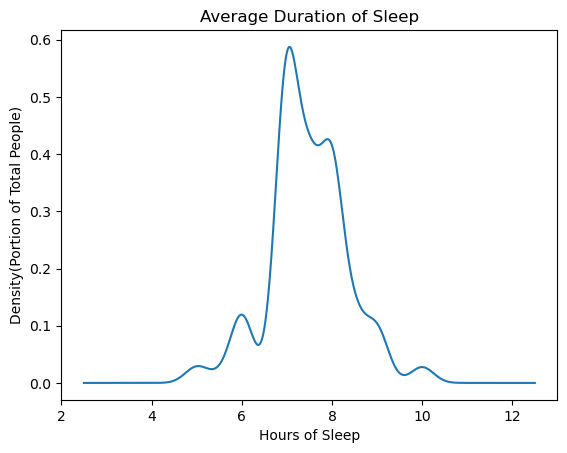

In [26]:
df["Sleep duration"].plot.density()
plt.xlabel("Hours of Sleep")
plt.ylabel("Density(Portion of Total People)")
plt.title("Average Duration of Sleep")

This graph depicts the average sleep that the people in this dataset receive. This is the base for the average and later on, I’m going to dissect the average by psychotropic drug intake and exercise.

Figure 2.

Text(0.5, 1.0, 'Sleep Efficiency(Time Spent Asleep)')

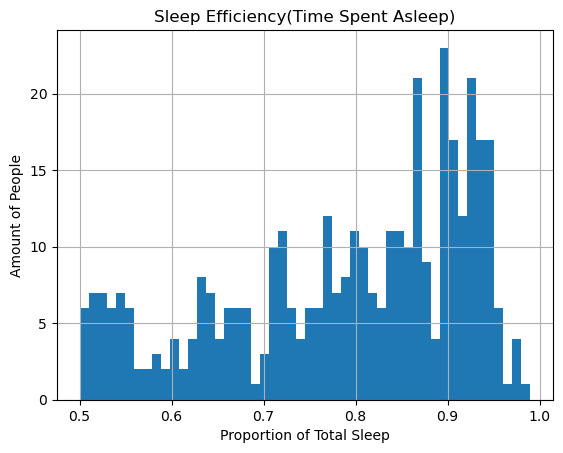

In [76]:
df["Sleep efficiency"].hist(bins=50)
plt.xlabel("Proportion of Total Sleep")
plt.xlabel("Proportion of Total Sleep")
plt.ylabel("Amount of People")
plt.title("Sleep Efficiency(Time Spent Asleep)")

The trend of this graph is indicative of how efficient each person’s sleep was on average. I can speculate that, the more sleep a person got, the more efficient their sleep was on average. After this point in my project, I decided to focus solely on sleep duration over sleep efficiency because that field provided data that portrayed virtually the same thing.

Figure 3.

<Axes: title={'center': 'Sleep Duration vs. Caffeine consumption'}, xlabel='Sleep duration', ylabel='Caffeine consumption'>

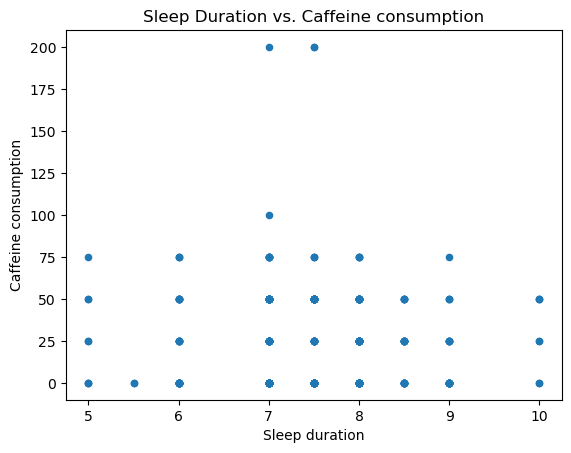

In [77]:
df.plot(kind='scatter', x='Sleep duration', y='Caffeine consumption', title="Sleep Duration vs. Caffeine consumption")

When I first coded this graph, I had hoped it would show me clusters of datapoints and I forgot to account for the fact that these datapoints were perfectly intervaled so it wouldn't depict what I wanted. Though this graph ultimately failed because it didn't show me the hot pocket of datapoints, I including it in my project because it highlighted the two outliers of people who drank 200 mg of caffeine in a day and still got 7 to 7.5 hours. I thought that was really interesting and worth noting.

Figure 4.

Text(0.5, 1.0, 'Duration of Sleep vs. Caffeine Consumption')

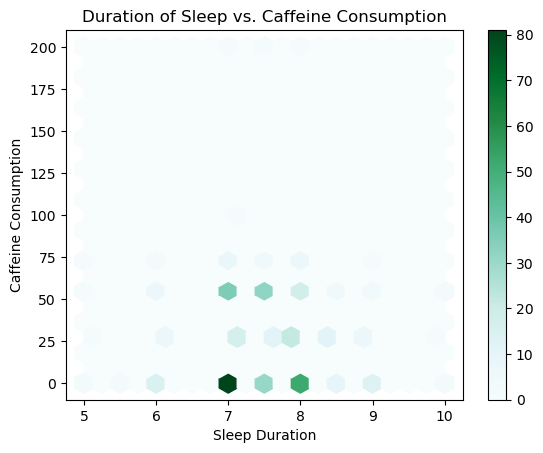

In [28]:
df.plot.hexbin(x='Sleep duration', y='Caffeine consumption', gridsize=20)
plt.xlabel("Sleep Duration")
plt.ylabel("Caffeine Consumption")
plt.title("Duration of Sleep vs. Caffeine Consumption")

I used a Hexbin plot to visualize the Duration of Sleep vs. Caffeine Consumption in a more efficient way because I realized that the data points would condense into a heat map. The trend of this graph is indicative of visualizing that the people who got the most sleep happened to consume a very low amount of caffeine, if any. This can be seen by the dark coloring of the hex when the caffeine intake was 0 mg and the most common duration of sleep tended to be in the 7-8 hour range.

Figure 5.

Text(0.5, 1.0, 'Duration of Sleep vs. Alcohol Consumption')

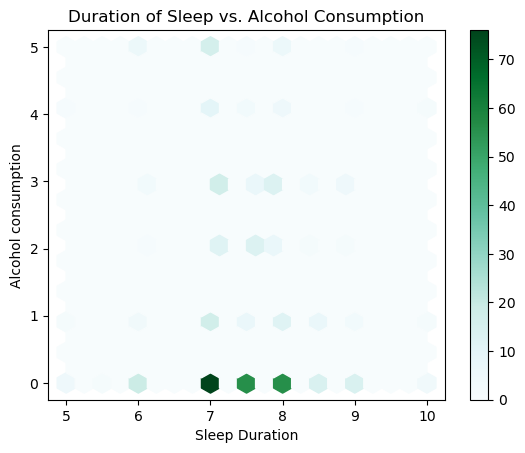

In [29]:
df.plot.hexbin(x='Sleep duration', y='Alcohol consumption', gridsize=20)
plt.xlabel("Sleep Duration")
plt.title("Duration of Sleep vs. Alcohol Consumption")

Because the Hexbin plot showed the cluster of datapoints in a cleaner way, I chose to use it with this graph as well. The trend of this figure is indicative of showing that the people who got the most sleep didn’t drink alcohol, as seen by the forest green hexes at the baseline consumption of zero ounces of alcohol.

Figure 6.

Text(0.5, 1.0, 'Duration of Sleep vs. Exercise Frequency')

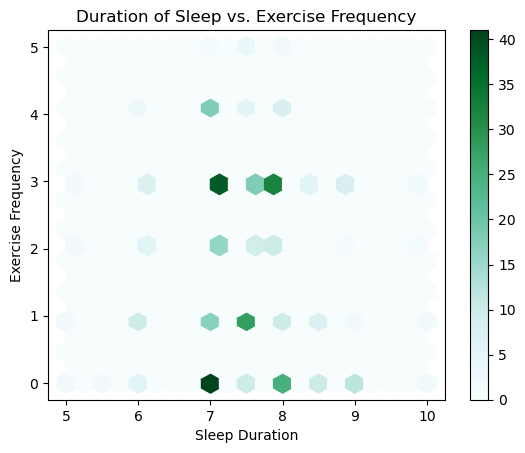

In [82]:
df.plot.hexbin(x='Sleep duration', y='Exercise frequency', gridsize=20)
plt.xlabel("Sleep Duration")
plt.ylabel("Exercise Frequency")
plt.title("Duration of Sleep vs. Exercise Frequency")

I found this graph to be a little confusing but once I got a closer look, I believe it indicates that people who don’t exercise received just as much sleep as people who exercise 0-3 times a week, if not more. I think in this case, I can speculate that a moderate amount of exercise per week can help you but it won't hurt you significantly if you choose to be more sedentary.

Figure 7.

[Text(0.5, 1.0, 'Duration of Sleep vs. Smoking Status')]

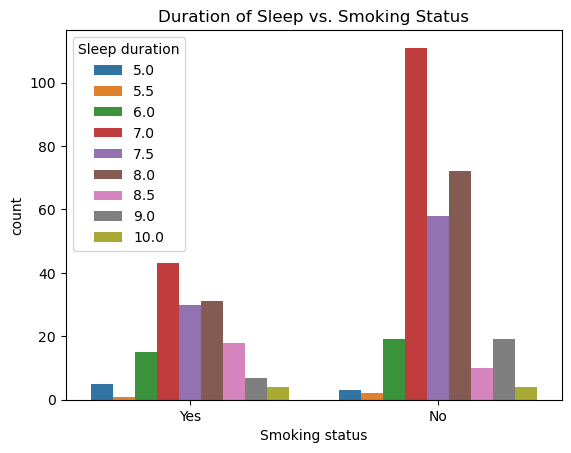

In [37]:
sns.countplot(data=df, x='Smoking status', hue='Sleep duration').set(title='Duration of Sleep vs. Smoking Status')

This graph in particular uses Seaborn to visualize the data. I found it really fascinating how drastic the change from smoker to nonsmoker was. I couldn't change the colors unfortunately but I focused on the 3 highest bars(red, purple, and brown) on each side of the smoking status. I found that the trend of this graph was indicative of showing that people who don't tend to smoke, happen to get more sleep. I think that something the graph doesn't account for is the fact that the amount of smokers and nonsmokers wasn't split evenly and therefore the results aren't reliable. If I were to conduct a study that posed the question, does smoking affect sleep, I'd get the same number of smokers and nonsmokers and put them through the sleep tests that put together the original dataset. I also don't know how much those who checked off the smoking question in the study actually smoke per day, only that they do, which may account for the scattered data and outliers. 

# Final Thoughts & Observations

When I first started this project, I thought that my research questions were most likely to be answered with density plots and so I stuck to creating those for the majority of my graphs. I found that visualizing the effect of one column of data on another was easier to picture in a condensed form. For 3 of my graphs, I depicted sleep duration in contrast to exercise frequency as well as in contrast to the consumption of psychotropic drugs like alcohol and caffeine using 2D density(hexbin) plots. I had around 450 data points to compare so my data was quite dense in a traditional scatter plot so I had to resort to using a hexbin plot instead. I tried to pay attention to the data ink ratio in my graphs and charts and made sure that there wasn’t an excessive amount of unnecessary ink being used to represent the data. I believe visual aesthetics as well as adhering to a design that is going to concentrate a viewer’s attention to the data is of utmost importance. Using color really helped me understand my visualizations in a better way and so I assumed that my audience would feel the same.

Though I didn't fully know which way my visuals were headed, some of them confirmed my original speculations. I thought that alcohol and caffeine consumption would have negative effects on sleep and the graphs were indicative that people who didn't tend to partake in those activites had more sleep than those who did. Finding the relationship between smoking status and sleep duration proved to be a little more difficult that I had anticipated but that graph was also indicative of the same speculation from the effects of the other two drugs. Exercise frequency was the one column of data that was confusing to decipher after creating the graph but that graph showed a high duration of sleep for those who exercised and those who didn't and was therefore inconclusive. Overall, I loved trying to figure out the behind the scenes work of statistics and data visualization even though the results didn't prove my initial assumptions correct.

I think something that could cause a potential problem from this project is that people might not understand that this is simply one dataset of only 452 people. Everyone tends to generalize findings and apply it to their lives but it could be dangerous in this case. For example, if people exercise in an excessive capacity, it could lead to body dysmorphia or an overworked and frail body. I think it's important to address that my take on the visualizations I've produced from this dataset is speculation and isn't to be construed as fact.

This project doesn't include every facet of the effects on sleep and therefore should only be seen as a rough guideline. Because it's not representative of more data from other cities and countries, it can't be used to generalize or provide 100% accurate advice. This project helps people understand that certain lifestyle choices have worse effects than others and to be more watchful. In reference to the smoking section of data, my visualization only accounts for the supposedly adverse effects in relation to people who just smoke and it doesn’t take into account the people who don’t do any of the drugs above. When I was recieving my user feedback, I was really glad that Elin and Colby brought up my intial unreadable axes labels because it's such a crucial part to understanding visualizations. After I took their advice, I could see my graphs in a much more comprehendable way. 

Something I believe this dataset could benefit from is a control variable. I want to compare people who don't do any drugs and don't exercise and use that to compare to the people who do. I think the visuals would be much more comprehensive and might have more of a basis for visualizing the effects of the lifestyle factors.

**Revisions**
If given a chance to revise my visualizations, I would like to further analyze the other relationships in my dataset. I created many visuals from just using 6 columns of my data and I'd really like to explore more, especially in comparison to age and gender. While my dataset accounted for a 50/50 split in men and women, it didn't survey every age and I'd like to find out if people get more or less sleep as people get older. 



**References(APA)**

Crocq, M.-A. (2003). Alcohol, nicotine, caffeine, and mental disorders. Dialogues in Clinical Neuroscience, 5(2), 175–185. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3181622/

Sleep efficiency dataset. (2023)., from https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency